In [26]:
import spotipy 
import pandas as pd 
from spotipy.oauth2 import SpotifyClientCredentials
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [102]:
def user_input_get_features(this_df):
    audio_feat = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                  'liveness', 'valence', 'tempo', 'time_signature']
    user_input = input("What song are you looking for? ")
    song_hits = list(this_df[this_df["name"].str.lower()==user_input.lower()]["artist"])
    if song_hits:
        if len(song_hits) == 1:
            numpy_lst = []
            for a_f in audio_feat:
                numpy_lst.append(float(this_df[this_df["name"].str.lower()==user_input.lower()][a_f]))
            return np.array(numpy_lst).reshape(1,-1)
        else:
            print(f'Following artists found for "{user_input}":\n ')
            c = 0
            for a in song_hits:
                c += 1
                print(f" + {c}: {a}")
            print(" -------\n+ S: Search alternative on Spotify")
            user_choice = 241
            while 0 > int(user_choice) or int(user_choice) > len(song_hits)+1:
                user_choice = input(f"Please specify your entry (1 to {len(song_hits)}): ")
                if user_choice.lower() == "s":
                    return get_unknown_song_array(user_input)
                if user_choice.isnumeric() == False:
                    print("please check entry.")
                    user_choice = len(song_hits)+2
                if 0 > int(user_choice) > len(song_hits)+1:
                    print("please check entry.")
            this_df_index = list(this_df[this_df["name"].str.lower()==user_input.lower()].index)[int(user_choice)-1]
            # print(df_.iloc[df_index]["danceability"])
            numpy_lst = []
            for a_f in audio_feat:
                numpy_lst.append(float(this_df.iloc[this_df_index][a_f]))
            return np.array(numpy_lst).reshape(1,-1)
    else:
        print("Song not found in local database, searching on Spotify.")
        return get_unknown_song_array(user_input)

In [2]:
def load_songs(fp:[str]=None):
    if not fp:
        print("No filepath provided")
        return None
    try:
        return pd.read_csv(fp, sep=";", error_bad_lines=False)
    except FileNotFoundError:
        print("File not found.")
        return None

In [5]:
#get a random song from the same cluster: put it together
def get_random_song_cluster(song):
    x=sp.search(song, limit=1)
    song_info=sp.audio_features([x["tracks"]["items"][0]["id"]])
    #remove features not used in the model
    remove_list = ['mode', 'duration_ms', 'id', 'type', 'uri', 'track_href', 'analysis_url'] 
    [song_info[0].pop(key) for key in remove_list]
    song_list=list(song_info[0].values())
    #get song_array
    song_array = np.array(song_list).reshape(1, -1)
    #get song_array scaled 
    scaled_song = scaler.transform(song_array)
    #predict cluster
    cluster_pred = kmeans.predict(scaled_song)[0]
    #get a random song from the same cluster
    index_song = X[X['cluster']==cluster_pred].sample().index[0]
    #get the id of random song
    id_song = song_df.iloc[index_song]['id']
    
    return print(sp.track(id_song)["name"], " by ", sp.track(id_song)["artists"][0]["name"])

In [6]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="9d897a87744a49638d588daeca7f0994",
                                                           client_secret="1e0c19e2db6c4e3182c30885a6491ffd"))

In [3]:
# song_df = pd.read_csv("data/song_db.csv", sep=";", error_bad_lines=False)
song_df = pd.read_csv("C:/Users/roman/Python/PyCharmProjects/iron_hack/song_recommender/data/new_song_db.csv", sep=";")#, error_bad_lines=False)

In [4]:
song_df.head()

,id,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,key,mode,tempo,type,time_signature
0,278axYYcJD32AC3pF9Fw2F,Ti Amo,Pensando a te Rap Italiano Game Over,Various Artists,2022-02-11,200801,2,0.829,0.0940,0.767,0.000000,0.1640,-6.517,0.2820,0.491,0,1,125.994,audio_features,4
1,4IAbmVmPhczY0IeUz6JOQ3,Senza Di Me,Best of Hip Hop Hits,Various Artists,2022-02-14,201961,0,0.698,0.1740,0.636,0.000000,0.1250,-5.844,0.0356,0.313,8,1,107.257,audio_features,3
2,0Rsfm3UqHkNzKsb6L0Yz3Y,Esagono (feat. Salmo),Scatola Nera,Gemitaiz,2019-09-19,186426,52,0.827,0.0978,0.738,0.000000,0.0257,-6.403,0.2070,0.718,8,0,137.956,audio_features,4
3,5RISUKQNsSV5nhhfrzhcDC,Veleno 7,Best of Hip Hop Hits,Various Artists,2022-02-14,173960,0,0.794,0.1630,0.823,0.000026,0.3510,-6.731,0.0591,0.334,11,0,133.025,audio_features,4
4,5QsAv4sTEDsdozEgWbVQnb,Haterproof 2,Kepler,Gemitaiz,2014-05-27,187615,47,0.830,0.1950,0.881,0.000000,0.2880,-3.829,0.1280,0.743,5,1,125.984,audio_features,4


In [5]:
song_df["type"].value_counts()

audio_features    60581
Name: type, dtype: int64

In [6]:
song_df.drop_duplicates()

,id,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,key,mode,tempo,type,time_signature
0,278axYYcJD32AC3pF9Fw2F,Ti Amo,Pensando a te Rap Italiano Game Over,Various Artists,2022-02-11,200801,2,0.829,0.0940,0.767,0.000000,0.1640,-6.517,0.2820,0.491,0,1,125.994,audio_features,4
1,4IAbmVmPhczY0IeUz6JOQ3,Senza Di Me,Best of Hip Hop Hits,Various Artists,2022-02-14,201961,0,0.698,0.1740,0.636,0.000000,0.1250,-5.844,0.0356,0.313,8,1,107.257,audio_features,3
2,0Rsfm3UqHkNzKsb6L0Yz3Y,Esagono (feat. Salmo),Scatola Nera,Gemitaiz,2019-09-19,186426,52,0.827,0.0978,0.738,0.000000,0.0257,-6.403,0.2070,0.718,8,0,137.956,audio_features,4
3,5RISUKQNsSV5nhhfrzhcDC,Veleno 7,Best of Hip Hop Hits,Various Artists,2022-02-14,173960,0,0.794,0.1630,0.823,0.000026,0.3510,-6.731,0.0591,0.334,11,0,133.025,audio_features,4
4,5QsAv4sTEDsdozEgWbVQnb,Haterproof 2,Kepler,Gemitaiz,2014-05-27,187615,47,0.830,0.1950,0.881,0.000000,0.2880,-3.829,0.1280,0.743,5,1,125.984,audio_features,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60573,0pYqDTCeudlciGstMsdagD,Tun Samrath Vada,Shabad Gurbani,Bhai Gopal Singh Ragi,1976-12-31,384040,24,0.478,0.7410,0.259,0.000001,0.5420,-12.798,0.0326,0.631,0,0,116.111,audio_features,4
60574,1iF6lrJludTZmfgMgXPqSe,Nachange Saari Raat,Junooniyat,Various Artists,2016-05-30,251513,52,0.679,0.0799,0.921,0.000001,0.0636,-4.416,0.0362,0.755,1,0,131.084,audio_features,4
60575,79bRx0B6z0TQJR2maFxBrk,Draufgängerjunge,Draufgängerjunge,Samra,2021-12-10,188889,65,0.632,0.1850,0.644,0.000000,0.0864,-5.281,0.3490,0.410,1,1,89.751,audio_features,4
60576,442IWFKIrGrHTVjIrfc3YR,Ya Samra Hobek welali jamra,Ya Samra Hobek welali jamra,Yacine Tigre,2021-02-18,224104,44,0.463,0.6560,0.527,0.000000,0.0954,-6.157,0.0599,0.522,1,0,165.027,audio_features,3


In [8]:
song_df[song_df.artist == "Ani DiFranco"]

,id,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,key,mode,tempo,type,time_signature
21340,4FJsFAdLFGqrmuM74CIzhs,Both Hands,Ani DiFranco,Ani DiFranco,1990-11-01,218800,52,0.770,0.8900,0.1150,0.000006,0.1050,-19.668,0.0632,0.3530,7,1,138.966,audio_features,4
21341,2E8AVQcuYSlXm12g112Kef,Untouchable Face,Dilate,Ani DiFranco,1996-05-21,279066,48,0.681,0.6740,0.3350,0.000063,0.1200,-15.361,0.0405,0.3890,7,1,111.621,audio_features,4
21343,6oipWwDsUB0XCoZfZeRBvW,32 Flavors,Not A Pretty Girl,Ani DiFranco,1995-07-18,367933,48,0.492,0.2450,0.4840,0.012800,0.1280,-9.812,0.0658,0.1460,8,1,91.395,audio_features,4
21344,4pkQxuzzRyNzBmpQXztC3M,Not a Pretty Girl,Not A Pretty Girl,Ani DiFranco,1995-07-18,237653,45,0.334,0.2220,0.4750,0.000000,0.0746,-9.056,0.0670,0.1550,2,1,174.085,audio_features,3
21345,1XAY4zlJWqJl3d6Eqy1A7q,Little Plastic Castle,Little Plastic Castle,Ani DiFranco,1998-02-17,244160,41,0.610,0.1330,0.6000,0.003360,0.0789,-9.844,0.1000,0.1970,2,1,95.897,audio_features,3
21346,5ezdmutheOfhOIdoEeK5vM,You Had Time,Out Of Range,Ani DiFranco,1994-07-26,349000,36,0.510,0.9780,0.0700,0.008920,0.0879,-22.532,0.0414,0.2240,6,1,85.974,audio_features,4
21349,7A2lr0HB8A2QXZdB3AonvH,As Is,Little Plastic Castle,Ani DiFranco,1998-02-17,246226,38,0.745,0.6410,0.3890,0.003110,0.0997,-15.983,0.0392,0.7780,10,1,94.515,audio_features,4
21351,7LjFcq4C2NGlXrSadUma79,Gravel,Little Plastic Castle,Ani DiFranco,1998-02-17,212133,34,0.757,0.3110,0.5810,0.000125,0.0755,-8.922,0.1450,0.8630,0,1,139.175,audio_features,4
21352,15l4c3gs7Vf3dBC4ACgC8U,Revolutionary Love,Revolutionary Love,Ani DiFranco,2021-01-29,429760,33,0.564,0.7810,0.3500,0.000122,0.1110,-11.092,0.0880,0.3180,0,0,146.385,audio_features,4
21354,2tOgmHatf0bUEQ1xONjWAk,Talk to Me Now,Ani DiFranco,Ani DiFranco,1990-11-01,269600,31,0.747,0.8280,0.1070,0.000021,0.0881,-17.034,0.0734,0.5290,9,0,124.854,audio_features,4


## Clustering

Legend of the spotify API features:

- <strong>Danceability</strong>: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- <strong>Acousticness</strong>: A measure from 0.0 to 1.0 of whether the track is acoustic.
- Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
- <strong>Key</strong>:The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
- <strong>Instrumentalness</strong>: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
- <strong>Liveness</strong>: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
- <strong>Loudness</strong>: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.
- <strong>Mode</strong>: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- <strong>Speechiness</strong>: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
- <strong>Tempo</strong>: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- <strong>Time signature</strong> : An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure)
- <strong>Valence</strong>: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- <strong>Duration_ms </strong>: The duration of the track in milliseconds.

In [9]:
#define features
# song_df = load_songs("./data/song_db.csv")
X = song_df.drop(['id', 'length','name', 'album','artist','release_date', 'type', 'mode', 'popularity'], axis=1) 

In [10]:
# X.head(3)

In [11]:
## standardize
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,key,tempo,time_signature
0,0.829,0.0940,0.767,0.000000,0.1640,-6.517,0.2820,0.491,0,125.994,4
1,0.698,0.1740,0.636,0.000000,0.1250,-5.844,0.0356,0.313,8,107.257,3
2,0.827,0.0978,0.738,0.000000,0.0257,-6.403,0.2070,0.718,8,137.956,4
3,0.794,0.1630,0.823,0.000026,0.3510,-6.731,0.0591,0.334,11,133.025,4
4,0.830,0.1950,0.881,0.000000,0.2880,-3.829,0.1280,0.743,5,125.984,4


,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,key,tempo,time_signature
0,1.307161,-0.552940,0.534091,-0.321590,-0.183777,0.197689,1.696701,-0.054873,-1.468042,0.162131,0.179734
1,0.529140,-0.272437,-0.068506,-0.321590,-0.421407,0.344800,-0.580712,-0.801612,0.751647,-0.478199,-2.680380
2,1.295283,-0.539616,0.400691,-0.321590,-1.026450,0.222608,1.003495,0.897428,0.751647,0.570929,0.179734
3,1.099293,-0.311006,0.791689,-0.321466,0.955628,0.150910,-0.363508,-0.713514,1.584031,0.402413,0.179734
4,1.313100,-0.198804,1.058488,-0.321590,0.571764,0.785258,0.273318,1.002307,-0.080736,0.161790,0.179734


In [12]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=10, random_state=42)

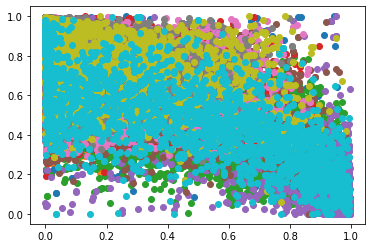

In [13]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 2])
    # show the plot
pyplot.show()

In [14]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     2187
1     9681
2     6645
3    11329
4     2119
5     5082
6    10176
7     7451
8     3267
9     2644
dtype: int64

In [15]:
#X_df = pd.DataFrame(X)
# X["cluster"] = clusters
song_df["cluster"] = clusters
X.head()

,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,key,tempo,time_signature
0,0.829,0.0940,0.767,0.000000,0.1640,-6.517,0.2820,0.491,0,125.994,4
1,0.698,0.1740,0.636,0.000000,0.1250,-5.844,0.0356,0.313,8,107.257,3
2,0.827,0.0978,0.738,0.000000,0.0257,-6.403,0.2070,0.718,8,137.956,4
3,0.794,0.1630,0.823,0.000026,0.3510,-6.731,0.0591,0.334,11,133.025,4
4,0.830,0.1950,0.881,0.000000,0.2880,-3.829,0.1280,0.743,5,125.984,4


In [ ]:
for _ in range(10):
    song_df[song_df.cluster == _].sample()

In [16]:
song_df.to_csv("./data/song_db_w_clusters1.csv", index=False)
kmeans.inertia_

322394.0905678683

In [17]:
kmeans2 = KMeans(n_clusters=50,
                init="k-means++",
                n_init=10, 
                max_iter=10,
                tol=0,
                algorithm="elkan",
                random_state=42)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)


198063.56147767635


In [18]:
def elbow_plot(this_X_scaled_df, k_min:[int]=2, k_max:[int]=21, save_fig_to:[str]=None):
    K = range(k_min, k_max)
    inertia = []

    for k in K:
        print("Number of clusters:", k)
        kmeans = KMeans(n_clusters=k,
                        random_state=42)
        kmeans.fit(this_X_scaled_df)
        inertia.append(kmeans.inertia_)

    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline

    plt.figure(figsize=(16,8))
    plt.plot(K, inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.xticks(np.arange(min(K), max(K)+1, 1.0))
    plt.title('Elbow Method showing the optimal k')
    if save_fig_to:
        plt.savefig(save_fig_to)

Number of clusters: 2
Number of clusters: 3
Number of clusters: 4
Number of clusters: 5
Number of clusters: 6
Number of clusters: 7
Number of clusters: 8
Number of clusters: 9
Number of clusters: 10
Number of clusters: 11
Number of clusters: 12
Number of clusters: 13
Number of clusters: 14
Number of clusters: 15
Number of clusters: 16
Number of clusters: 17
Number of clusters: 18
Number of clusters: 19
Number of clusters: 20


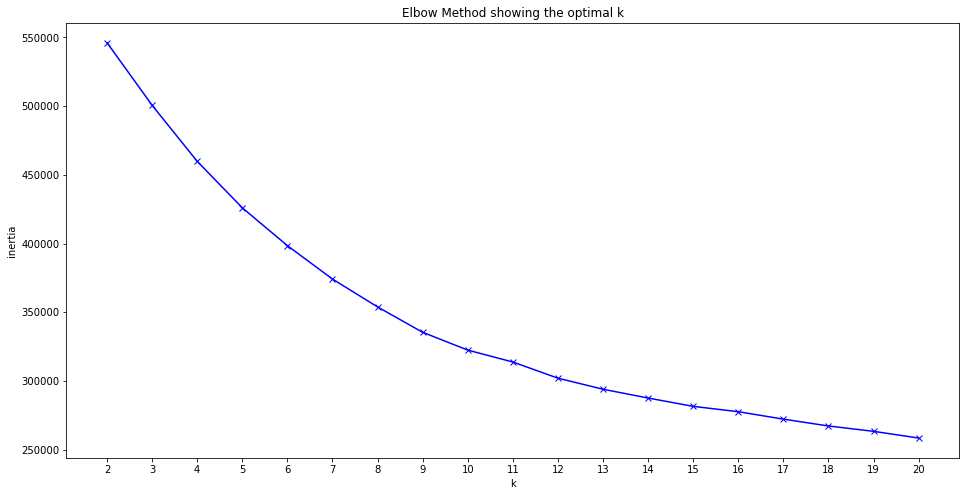

In [20]:
# elbow_plot(X_scaled_df, save_fig_to="./plots/ellbow02_20.png")

In [24]:
def silhouette_plot(this_X_scaled_df, k_min:[int]=2, k_max:[int]=21, save_fig_to:[str]=None):
    K = range(k_min, k_max)
    silhouette = []

    for k in K:
        print(f"Number of clusters: {k:2d} ... ", end="")
        kmeans = KMeans(n_clusters=k,
                        random_state=42)
        kmeans.fit(this_X_scaled_df)

        print(f"saving to Model/kmeans_{k}.pickle ...", end= "")
        filename = "Model/kmeans_" + str(k) + ".pickle"
        with open(filename, "wb") as f:
            pickle.dump(kmeans,f)
        print(" complete.")
        silhouette.append(silhouette_score(this_X_scaled_df, kmeans.predict(this_X_scaled_df)))

    plt.figure(figsize=(16,8))
    plt.plot(K, silhouette, 'bx-')
    plt.xlabel('k')
    plt.ylabel('silhouette score')
    plt.xticks(np.arange(min(K), max(K)+1, 1.0))
    plt.title('Silhouette Method showing the optimal k')
    if save_fig_to:
        plt.savefig(save_fig_to)

In [25]:
silhouette_plot(X_scaled_df, save_fig_to="./plots/silhouette02_20.png")

Number of clusters: 2 ... saving to Model/kmeans_2.pickle ... complete.
Number of clusters: 3 ... saving to Model/kmeans_3.pickle ... complete.
Number of clusters: 4 ... saving to Model/kmeans_4.pickle ... complete.
Number of clusters: 5 ... saving to Model/kmeans_5.pickle ... complete.
Number of clusters: 6 ... saving to Model/kmeans_6.pickle ... complete.
Number of clusters: 7 ... saving to Model/kmeans_7.pickle ... complete.
Number of clusters: 8 ... saving to Model/kmeans_8.pickle ... complete.
Number of clusters: 9 ... saving to Model/kmeans_9.pickle ... complete.
Number of clusters: 10 ... saving to Model/kmeans_10.pickle ... complete.
Number of clusters: 11 ... saving to Model/kmeans_11.pickle ... complete.
Number of clusters: 12 ... saving to Model/kmeans_12.pickle ... complete.
Number of clusters: 13 ... saving to Model/kmeans_13.pickle ... complete.
Number of clusters: 14 ... saving to Model/kmeans_14.pickle ... complete.
Number of clusters: 15 ... saving to Model/kmeans_15.p

NameError: name 'plt' is not defined

In [27]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("Model/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

# with open("Model/kmeans_4.pickle", "wb") as f:
#     pickle.dump(kmeans,f)

In [118]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 


## Input Song 

### Step by step

In [188]:
song_array = user_input_get_features(song_df)
song_array

What song are you looking for? eine kleine nachtmusik
Song not found in local database, searching on Spotify.
Following artists found for "eine kleine nachtmusik":
 
 + 1: Music Box Orchestra
 + 2: Wolfgang Amadeus Mozart
 + 3: IYASHINOOTO
 + 4: London Symphony Orchestra
 + 5: Wolfgang Amadeus Mozart
 + 6: Academy of St. Martin in the Fields
 + 7: Chill Fruits Music
 + 8: Wolfgang Amadeus Mozart
 + 9: Wolfgang Amadeus Mozart
 + 10: Music Box Orchestra
 + 11: Wolfgang Amadeus Mozart
 + 12: Wolfgang Amadeus Mozart
 + 13: Wolfgang Amadeus Mozart
 + 14: Wolfgang Amadeus Mozart
 + 15: Wolfgang Amadeus Mozart
Please specify your entry (1 to 15): 2


array([[ 5.14000e-01,  1.60000e-01,  7.00000e+00, -1.76050e+01,
         5.45000e-02,  9.06000e-01,  9.64000e-01,  9.83000e-02,
         5.34000e-01,  1.35197e+02,  4.00000e+00]])

In [45]:
song="Bad guy"
x=sp.search(song, limit=15)
song_info=sp.audio_features([x["tracks"]["items"][0]["id"]])
remove_list = ['mode', 'duration_ms', 'id', 'type', 'uri', 'track_href', 'analysis_url'] #remove features not used in the model
[song_info[0].pop(key) for key in remove_list] 
song_info

[{'danceability': 0.701,
  'energy': 0.425,
  'key': 7,
  'loudness': -10.965,
  'speechiness': 0.375,
  'acousticness': 0.328,
  'instrumentalness': 0.13,
  'liveness': 0.1,
  'valence': 0.562,
  'tempo': 135.128,
  'time_signature': 4}]

In [90]:
def get_unknown_song_array(this_song:[str]=None):
    if not this_song:
        print("no song provided.")
        return None
    x=sp.search(this_song, limit=15)
    if not x["tracks"]["items"]:
        print("song is not on spotify.")
        return None
    if len(x["tracks"]["items"]) == 1:
        pass
    else:
        artists_of_this_song = []
        for _ in range(len(x["tracks"]["items"])):
            artists_of_this_song.append(x["tracks"]["items"][_]["artists"][0]["name"])
        # artists_of_this_song = sorted(set(artists_of_this_song), key=lambda x: x.lower())
        print(f'Following artists found for "{this_song}":\n ')
        c = 0
        for a in artists_of_this_song:
            c += 1
            print(f" + {c}: {a}")
        user_choice = 241
        while 0 > int(user_choice) or int(user_choice) > len(artists_of_this_song) + 1:
            user_choice = input(f"Please specify your entry (1 to {len(artists_of_this_song)}): ")
            if user_choice.isnumeric() == False:
                print("please check entry.")
                user_choice = len(artists_of_this_song) + 2   # +2 to create a wrong int and run another while loop 
            if 0 > int(user_choice) > len(song_hits) + 1:
                print("please check entry.")
        # print((x["tracks"]["items"][int(user_choice)-1]["artists"][0]["name"]))
        song_info=sp.audio_features([x["tracks"]["items"][int(user_choice)-1]["id"]])
        remove_list = ['mode', 'duration_ms', 'id', 'type', 'uri', 'track_href', 'analysis_url'] #remove features not used in the model
        [song_info[0].pop(key) for key in remove_list] 
        song_list=list(song_info[0].values())
        song_list
        song_array = np.array(song_list).reshape(1, -1)
        song_array
        return song_array

In [91]:
# x = get_unknown_song_array("The Monster")
# x

In [79]:
find_unknown_song()

Following artists found for "Hallo Mutter":
 
 + 1: Eure Mütter
 + 2: Eure Mütter
 + 3: Monster Mash Halloween
 + 4: Haunted House Music
 + 5: Halloween Sounds
 + 6: Edvard Grieg
 + 7: Hansl Krönauer
 + 8: Mutterage
 + 9: Halloween Halloween
 + 10: Halloween Halloween
 + 11: Halloween Sounds
 + 12: Screaming Halloween
 + 13: Halloween Music
 + 14: Halloween Sounds
 + 15: Halloween Sounds
Please specify your entry (1 to 15): 1
Eure Mütter


In [ ]:
def user_song_search():
    user_song = input("What song are you looking for? ")
    

In [ ]:
song_list=list(song_info[0].values())
song_list

In [ ]:
song_array = np.array(song_list).reshape(1, -1)
song_array

In [208]:
song_array = user_input_get_features(song_df)

What song are you looking for? You should see me in a crown


In [176]:
len(song_array)

1

In [209]:
#standardize input song 
#X.drop(['cluster'], axis = 1, inplace = True)
#scaler = StandardScaler().fit(song_array)
scaled_song = scaler.transform(song_array)
scaled_song

C:\Users\roman\Python\anaconda\envs\DA_Env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 5.52472878e-01,  6.71206041e-01,  1.40147162e+01,
        -3.76272308e+01, -3.36131709e-02,  1.80570888e+00,
         1.18725877e+00, -1.37808640e+00, -1.37479546e+00,
         1.06520435e+00,  2.13119292e-01]])

In [210]:
# predict the cluster with kmeans
cluster_pred = kmeans.predict(scaled_song)[0]
cluster_pred

C:\Users\roman\Python\anaconda\envs\DA_Env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


1

In [211]:
#get a random song from the same cluster
index_song = song_df[song_df['cluster']==cluster_pred].sample().index[0]
index_song

43538

In [212]:
#get the id of random song
id_song = song_df.iloc[index_song]['id']
id_song

'1oLDaVcNF02KpFTotGQrG3'

In [213]:
#look for the name of the song
song_name=sp.track(id_song)["name"]
artists_name = sp.track(id_song)["artists"][0]["name"]

print(f"{song_name} by {artists_name}")

Heart On by Eagles Of Death Metal


Backstreet Boys


### Final function for song recommender

In [ ]:
#get a random song from the same cluster: put it together
def get_random_song_cluster(song):
    x=sp.search(song, limit=1)
    song_info=sp.audio_features([x["tracks"]["items"][0]["id"]])
    #remove features not used in the model
    remove_list = ['mode', 'duration_ms', 'id', 'type', 'uri', 'track_href', 'analysis_url'] 
    [song_info[0].pop(key) for key in remove_list]
    song_list=list(song_info[0].values())
    #get song_array
    song_array = np.array(song_list).reshape(1, -1)
    #get song_array scaled 
    scaled_song = scaler.transform(song_array)
    #predict cluster
    cluster_pred = kmeans.predict(scaled_song)[0]
    #get a random song from the same cluster
    index_song = X[X['cluster']==cluster_pred].sample().index[0]
    #get the id of random song
    id_song = song_df.iloc[index_song]['id']
    
    return print(sp.track(id_song)["name"], " by ", sp.track(id_song)["artists"][0]["name"])

In [ ]:
#test the function
get_random_song_cluster("Radioactive")